# First Steps

This is an example of what you can already with GMT/Python. 
We'll mostly reproduce some examples from the [GMT Tutorial](http://gmt.soest.hawaii.edu/doc/latest/GMT_Tutorial.html#session-one).

## Loading the library

The GMT modules are available as functions and classes in the `gmt` Python package. 
So we'll start by importing it:

In [1]:
import gmt

## A first map

All figure generation in GMT/Python is handled by the `gmt.Figure` class. 
It has methods to add layers to your figure, like a basemap, coastlines, and data.

We start a new figure by creating an instance of `gmt.Figure`:

In [2]:
fig = gmt.Figure()

We add elements to the figure using its methods. For example, lets add the coastlines of Central America to a 6 inch wide map using the Mercator projection (`M`). Our figure will also have a nice frame with automatic ticks.

In [3]:
fig.coast(region=[-90, -70, 0, 20], projection='M6i', land='chocolate', 
          frame=True)

You can see a preview of the figure directly in the [Jupyter notebook](http://jupyter.org) using `fig.show()`.

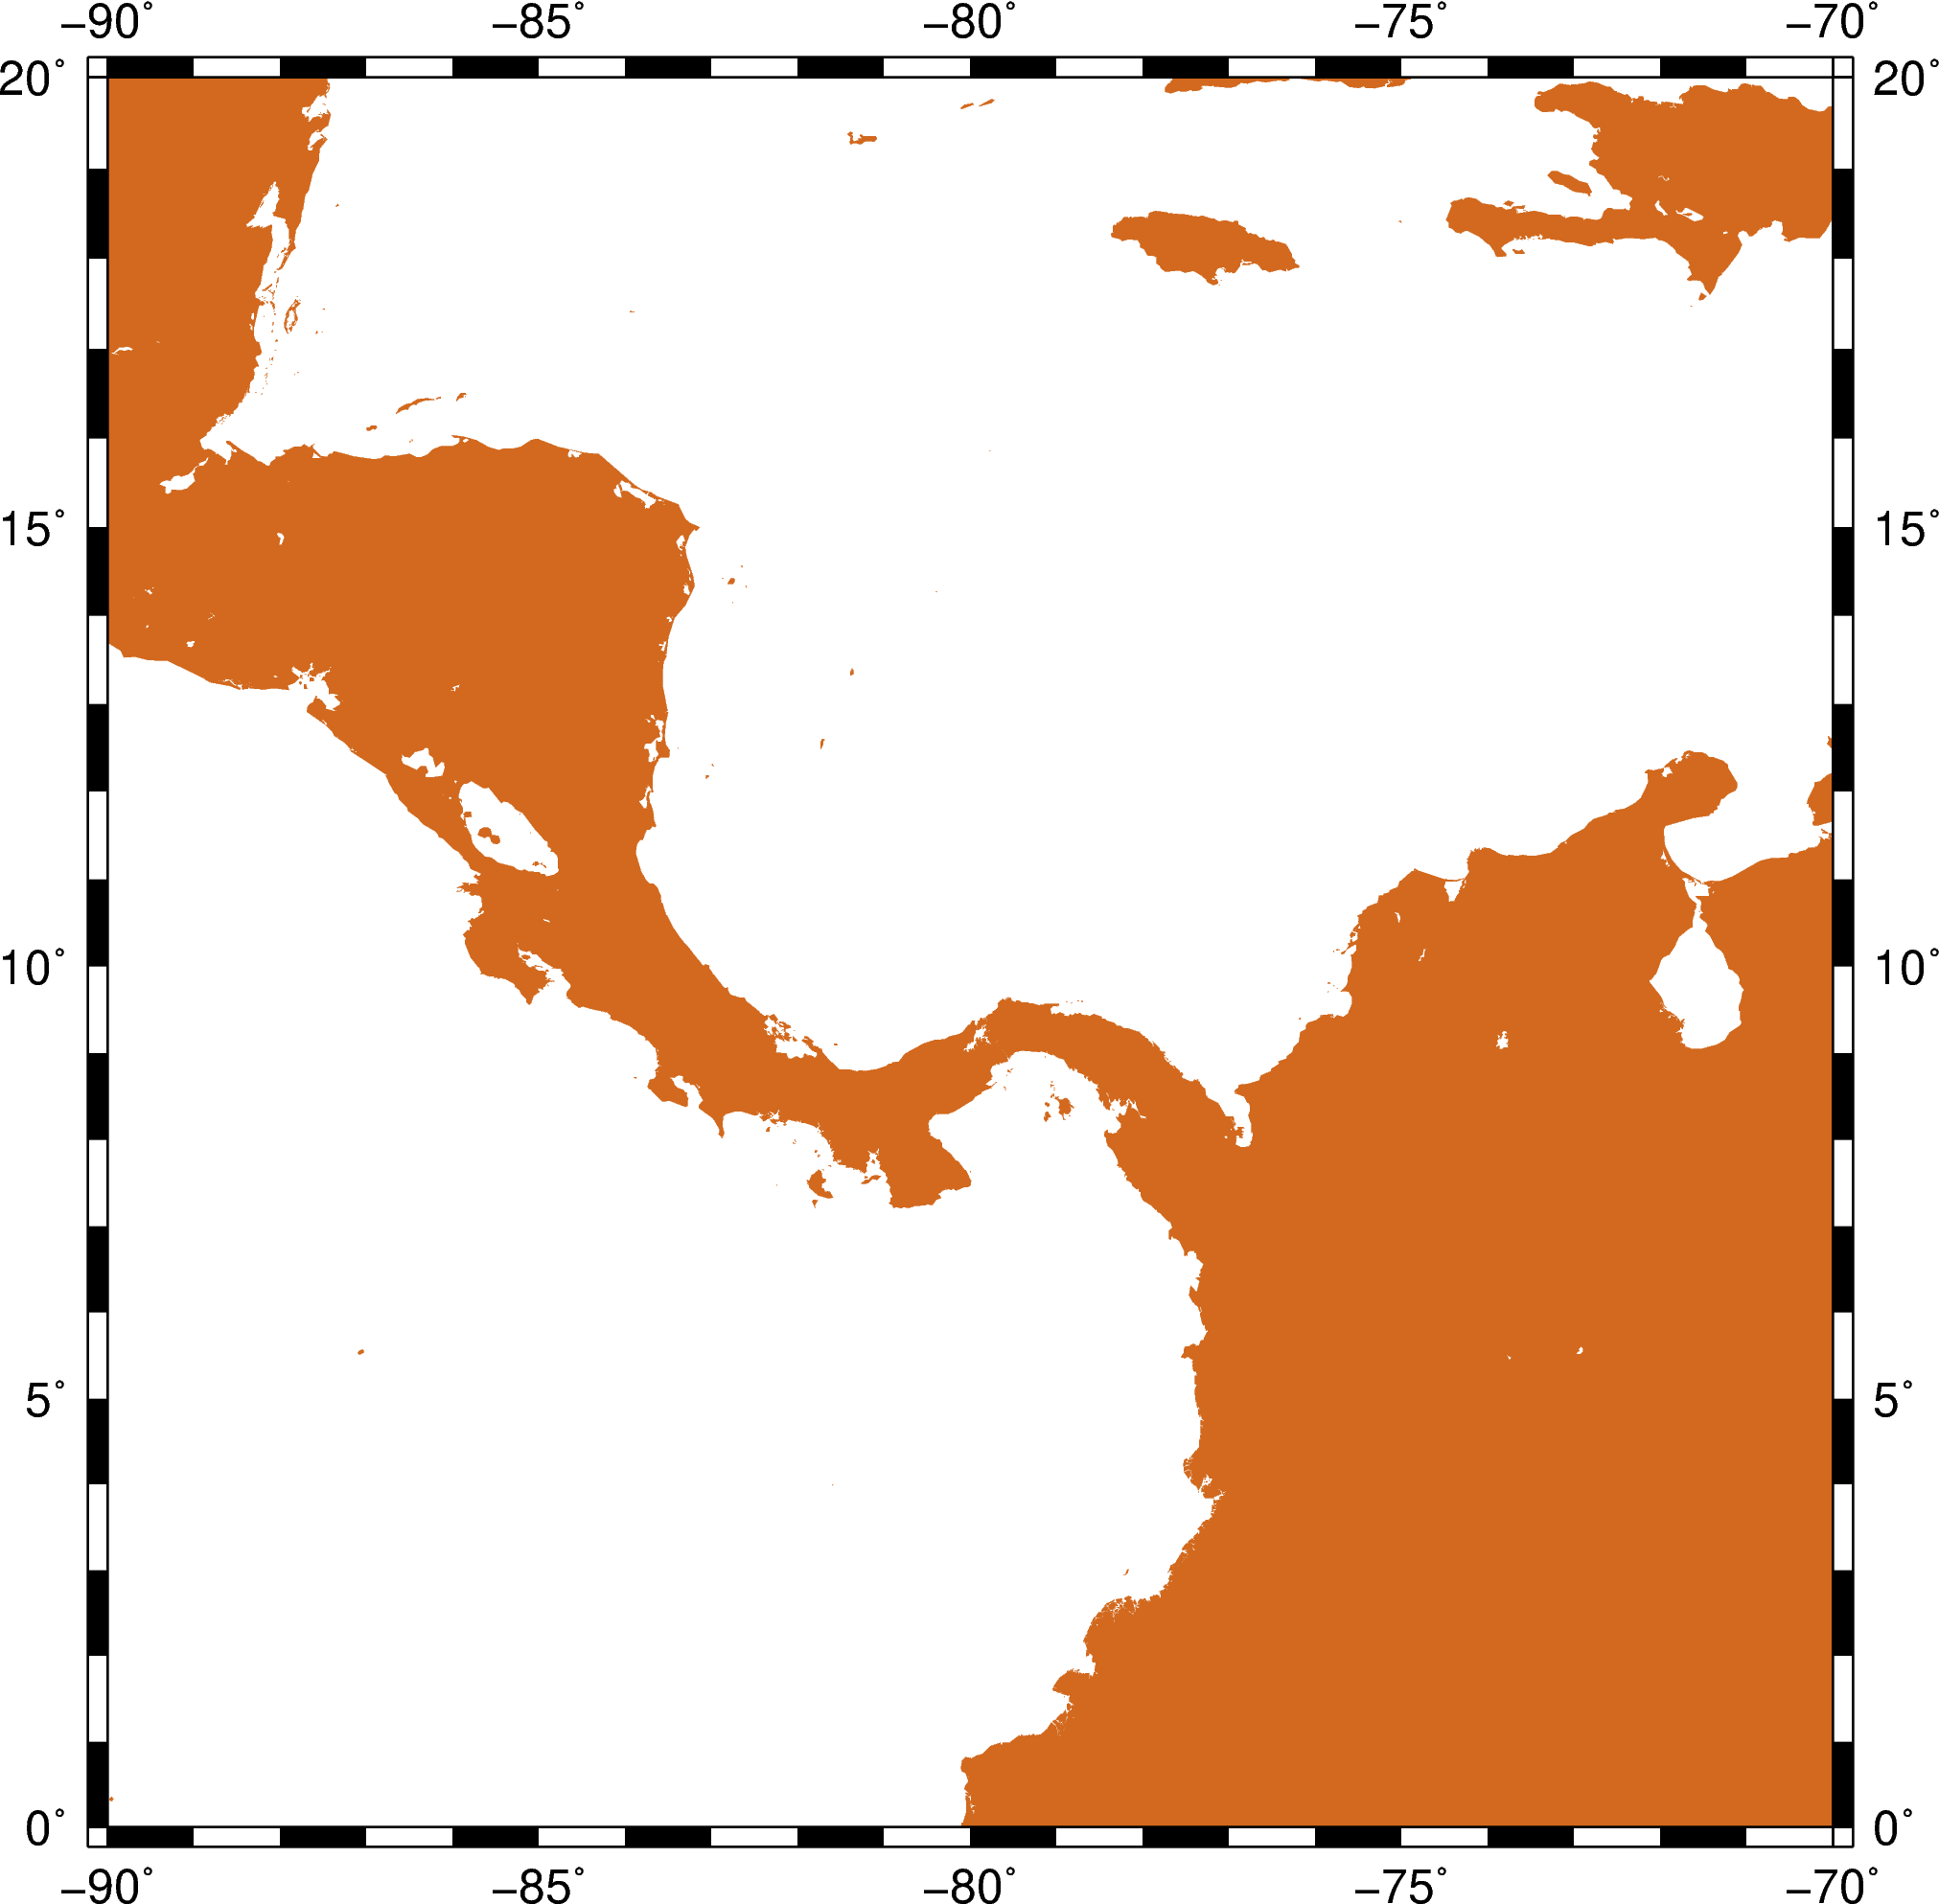

In [4]:
fig.show()

To open a PDF preview of the figure using your default PDF viewer use:

```python
fig.show(external=True)
```

This is useful when using the Python shell or IPython terminal app. 
However, **this command will not interrupt your Python process**. 
So using it in a Python script will not work because the script will finish and delete the generated previews.
Use `fig.savefig` to save the figure to a file instead (see below).

## A note for experienced GMT users

You'll probably have noticed several things that are different from classic command-line GMT.
Many of these changes reflect the new GMT [modern execution mode](http://gmt.soest.hawaii.edu/projects/gmt/wiki/Modernization) that will be part of the future 6.0 release.
A few are GMT/Python exclusive (like the long argument names).

1. The name of method is `coast` instead of `pscoast`. As a general rule, all `ps*` modules had their `ps` removed. The exceptions are: `psxy == plot`, `psxyz == plot3d`, and `psscale == colorbar`.
2. The arguments don't use the GMT 1-letter syntax (R, J, B, etc). Those are still available as aliases and the methods will accept them (see below). 
3. Arguments like `region` can take lists instead of strings like `1/2/3/4`. You can still use the string form but the list form is easier in Python.
4. If a GMT argument has no options (like `-B` instead of `-Baf`), use a `True` value instead. An empty string would also be acceptable.
5. There is no output redirecting to a PostScript file. The figure is generated in the background and will only be shown or saved when you ask for it.

We could have generated the figure above using the classic GMT argument names (but not the module names):

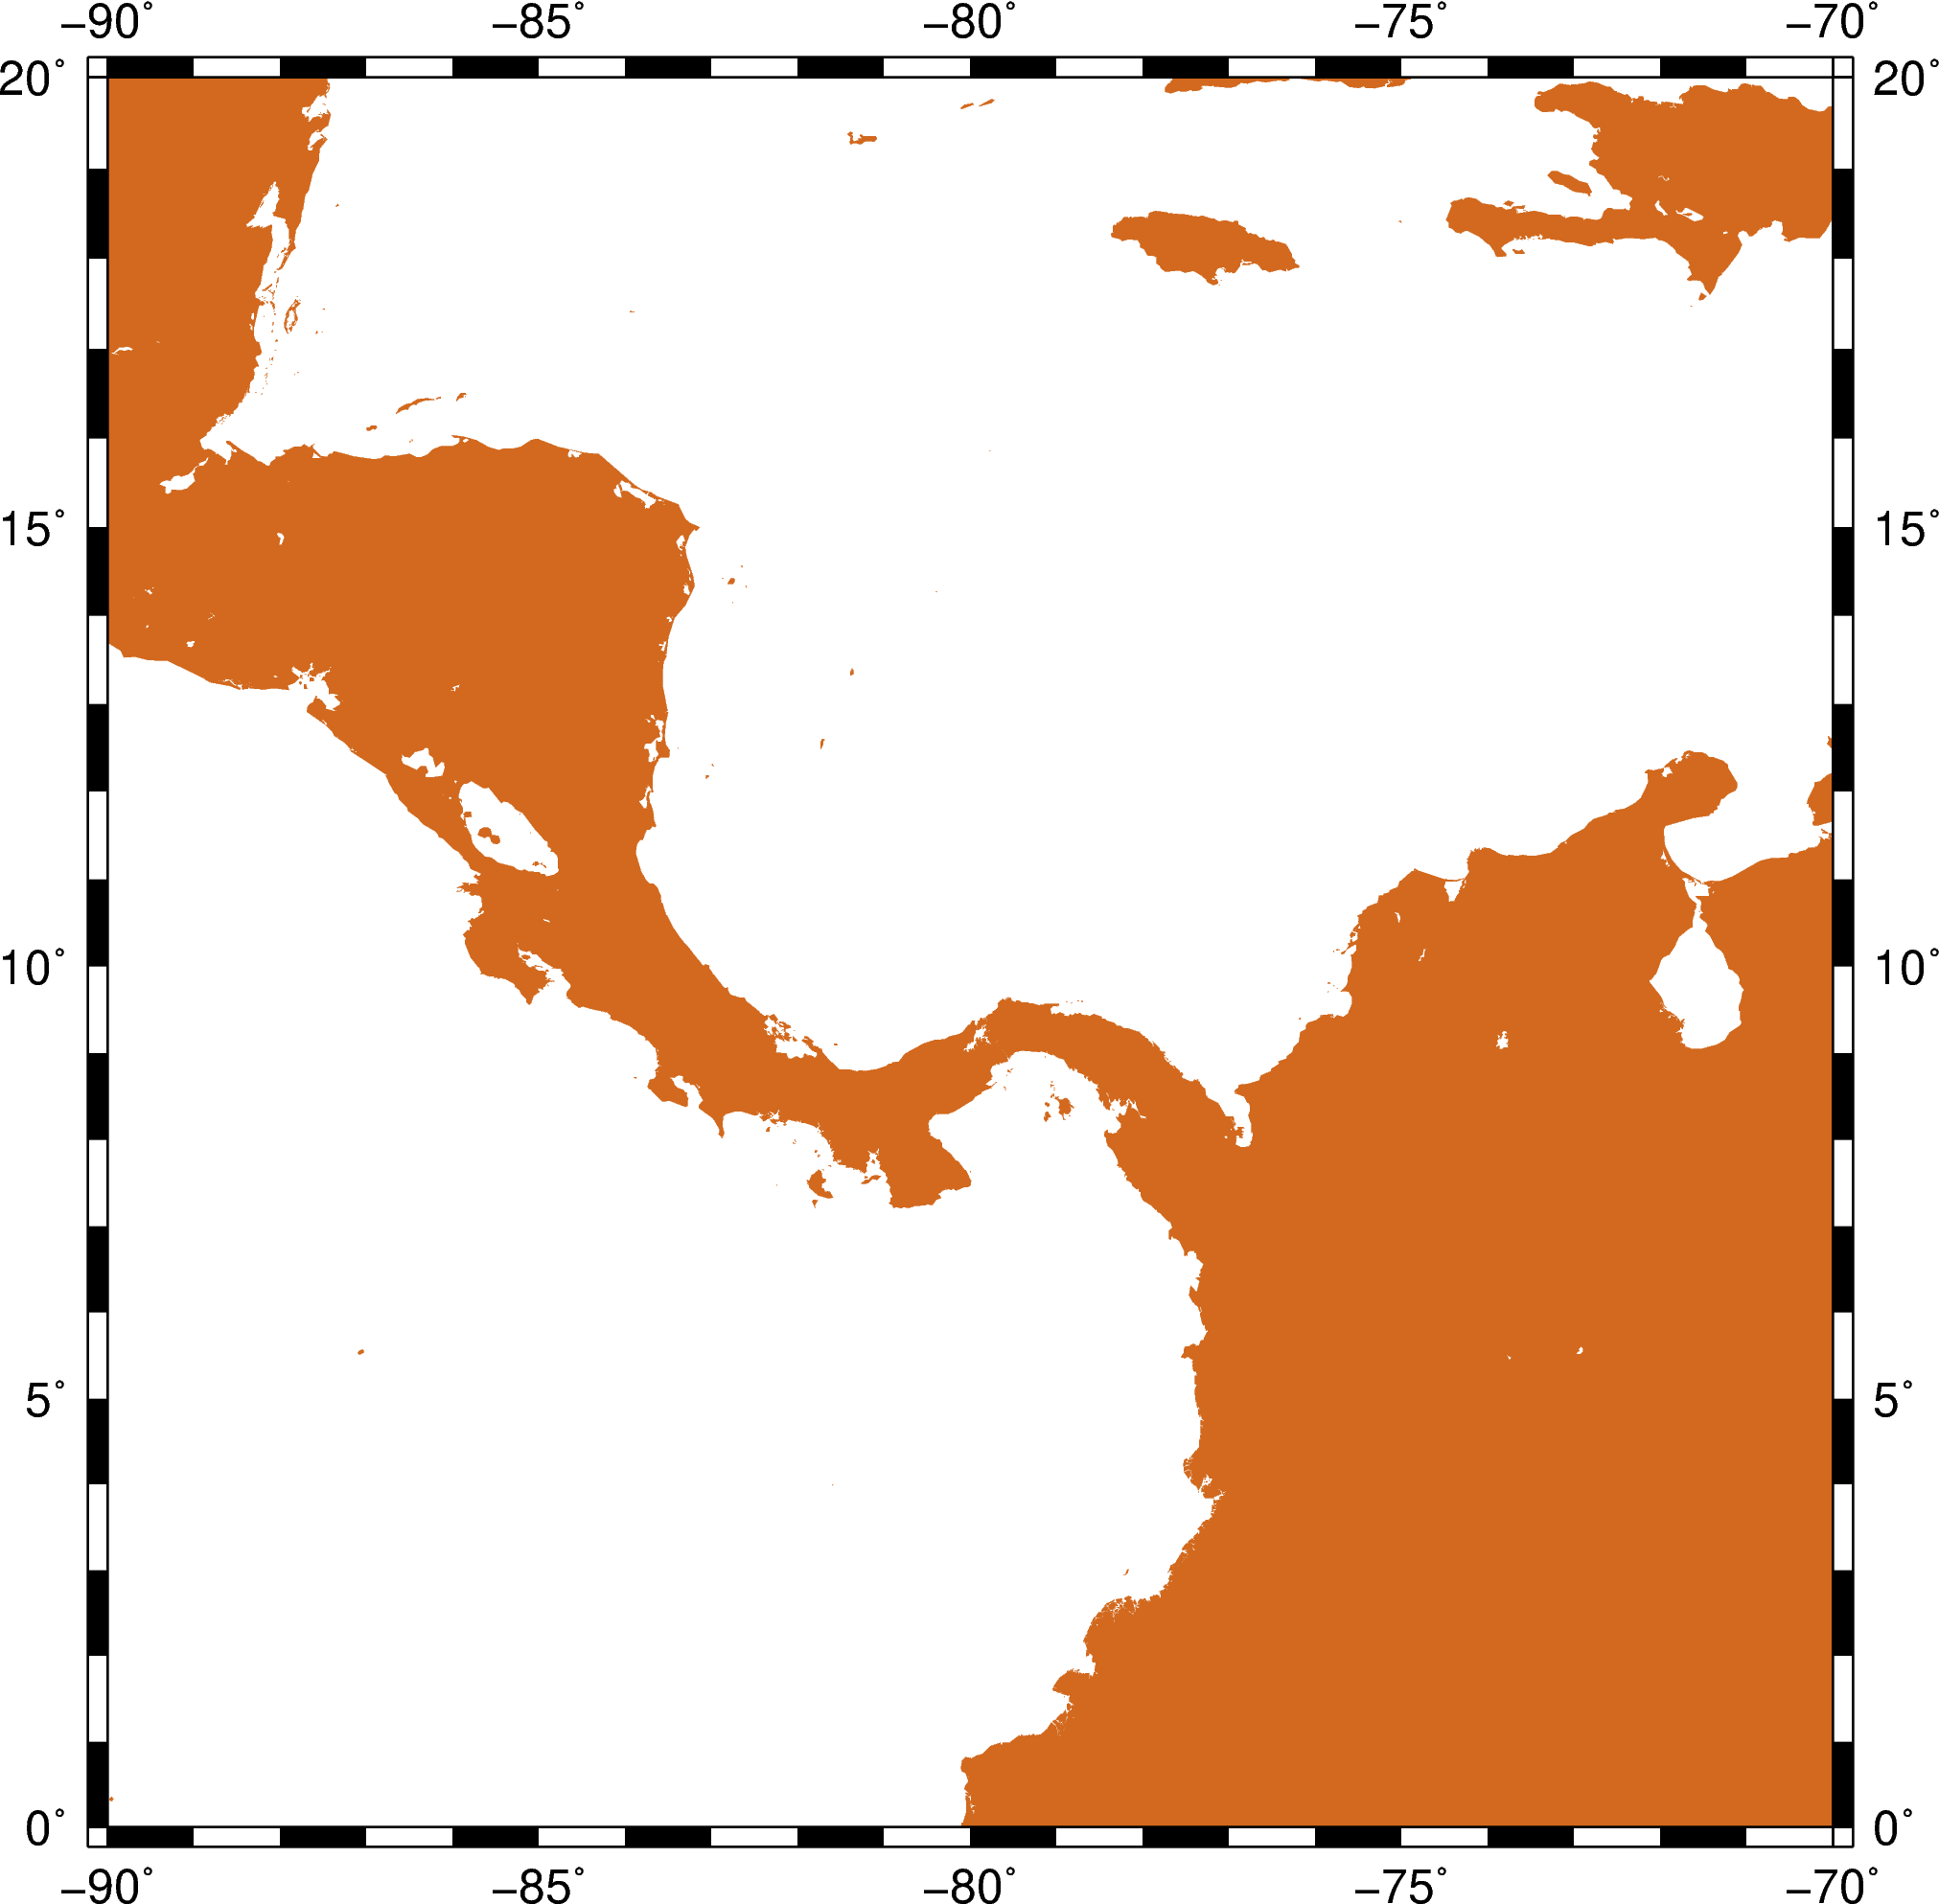

In [5]:
fig_alias = gmt.Figure()
fig_alias.coast(R='-90/-70/0/20', J='M6i', G='chocolate', B=True)
fig_alias.show()

## Saving the figure

Unlike the GMT command-line interface, **no figure file was generated until you ask for one**.

Use method `fig.savefig` (based on the [matplotlib](https://matplotlib.org/) function) to save your figure to a file:

In [6]:
fig.savefig('first-steps-central-america.png')

If you're running a Python script, you can tell `fig.savefig` to open the figure in an external viewer:

```python
fig.savefig('first-steps-central-america.png', show=True)
```

The classic GMT command `psconvert` is also available (and is used by `savefig` in the background):

In [7]:
# Format 'f' means a PDF
fig.psconvert(prefix='first-steps-central-america', fmt='f')

## Plot point data

We can use `gmt.Figure.plot` to plot data on our map.

First, lets create some fake data to plot using numpy:

In [8]:
import numpy as np

In [9]:
# See the random number generator so we always 
# get the same numbers
np.random.seed(42)

ndata = 30
region = [150, 240, -30, 60]
lon = np.random.uniform(region[0], region[1], ndata)
lat = np.random.uniform(region[2], region[3], ndata)
magnitude = np.random.uniform(1, 9, ndata)
depth = np.random.uniform(0, 1, ndata)

There are 3 ways to pass data into `Figure.plot`:

1. x and y coordinates as 1d numpy arrays using the `x` and `y` arguments.
2. A whole data table as a 2d numpy array using the `data` argument.
3. A file name using the `data` argument.

Let's explore all of these options.

### Using x and y

Now we can plot the data using `Figure.plot` and passing the x and y coordinate arrays:

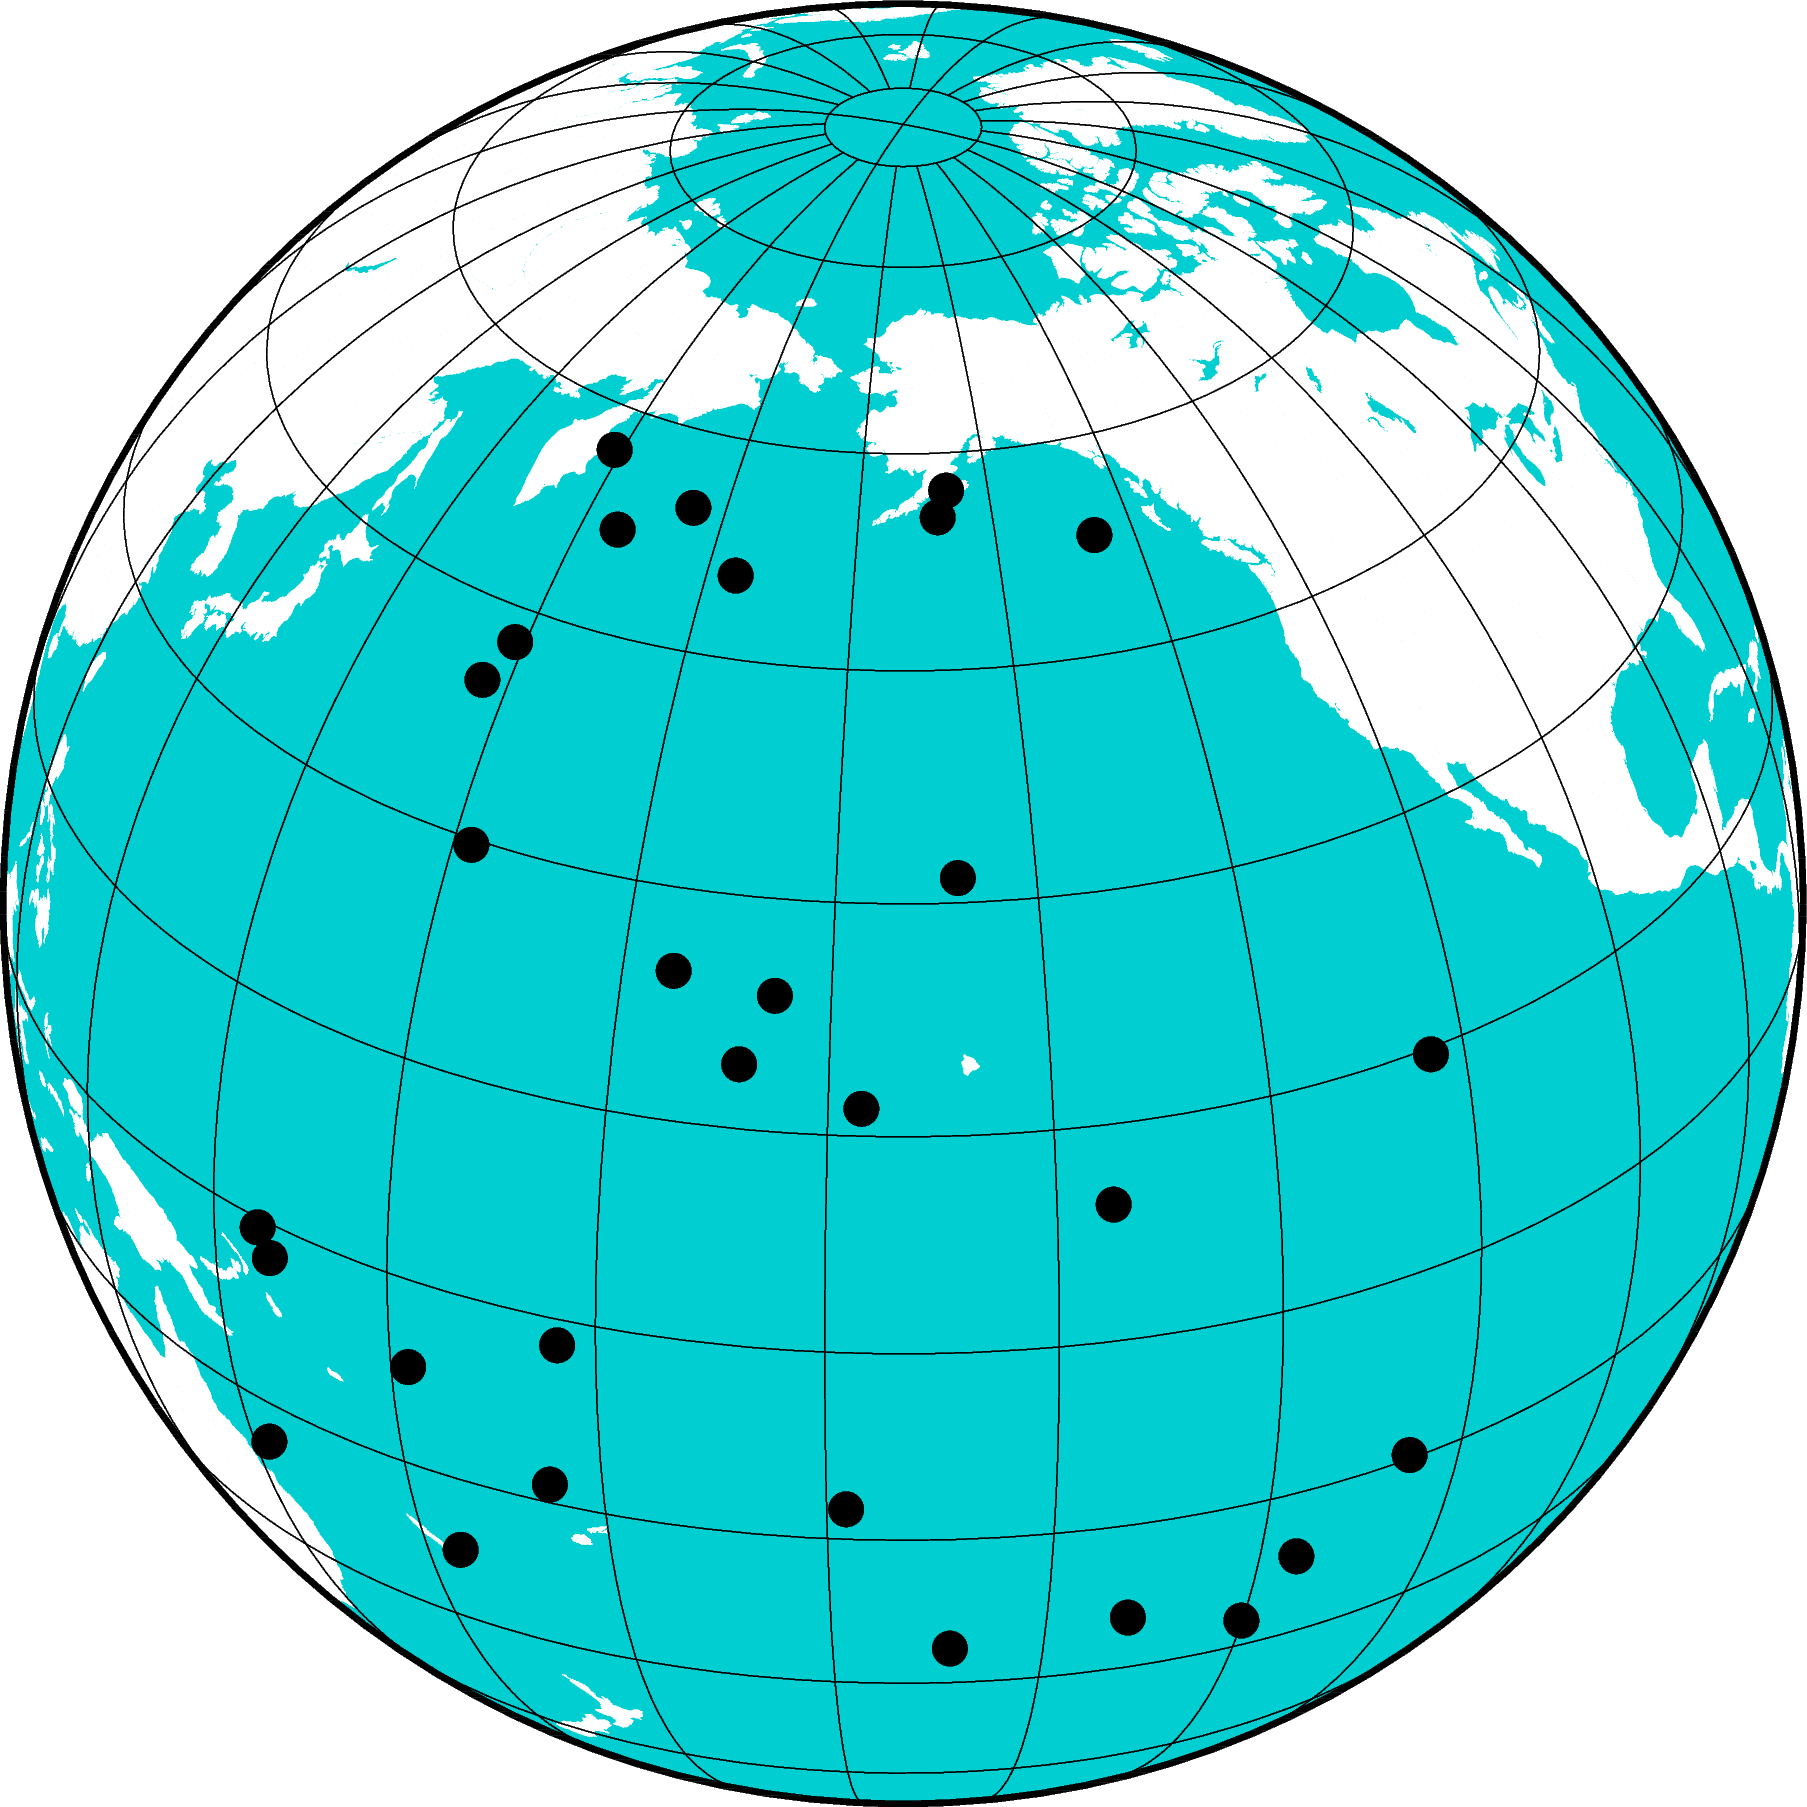

In [10]:
fig = gmt.Figure()
fig.coast(region='g', projection='G200/30/6i', frame='ag', 
          resolution='i', area_thresh=5000, land='white', 
          water='DarkTurquoise')
# Plot using circles (c) of 0.3 cm
fig.plot(x=lon, y=lat, style='c0.3c', color='black')
fig.show()

We can make the size of the markers follow a data value by passing in the argument `sizes`:

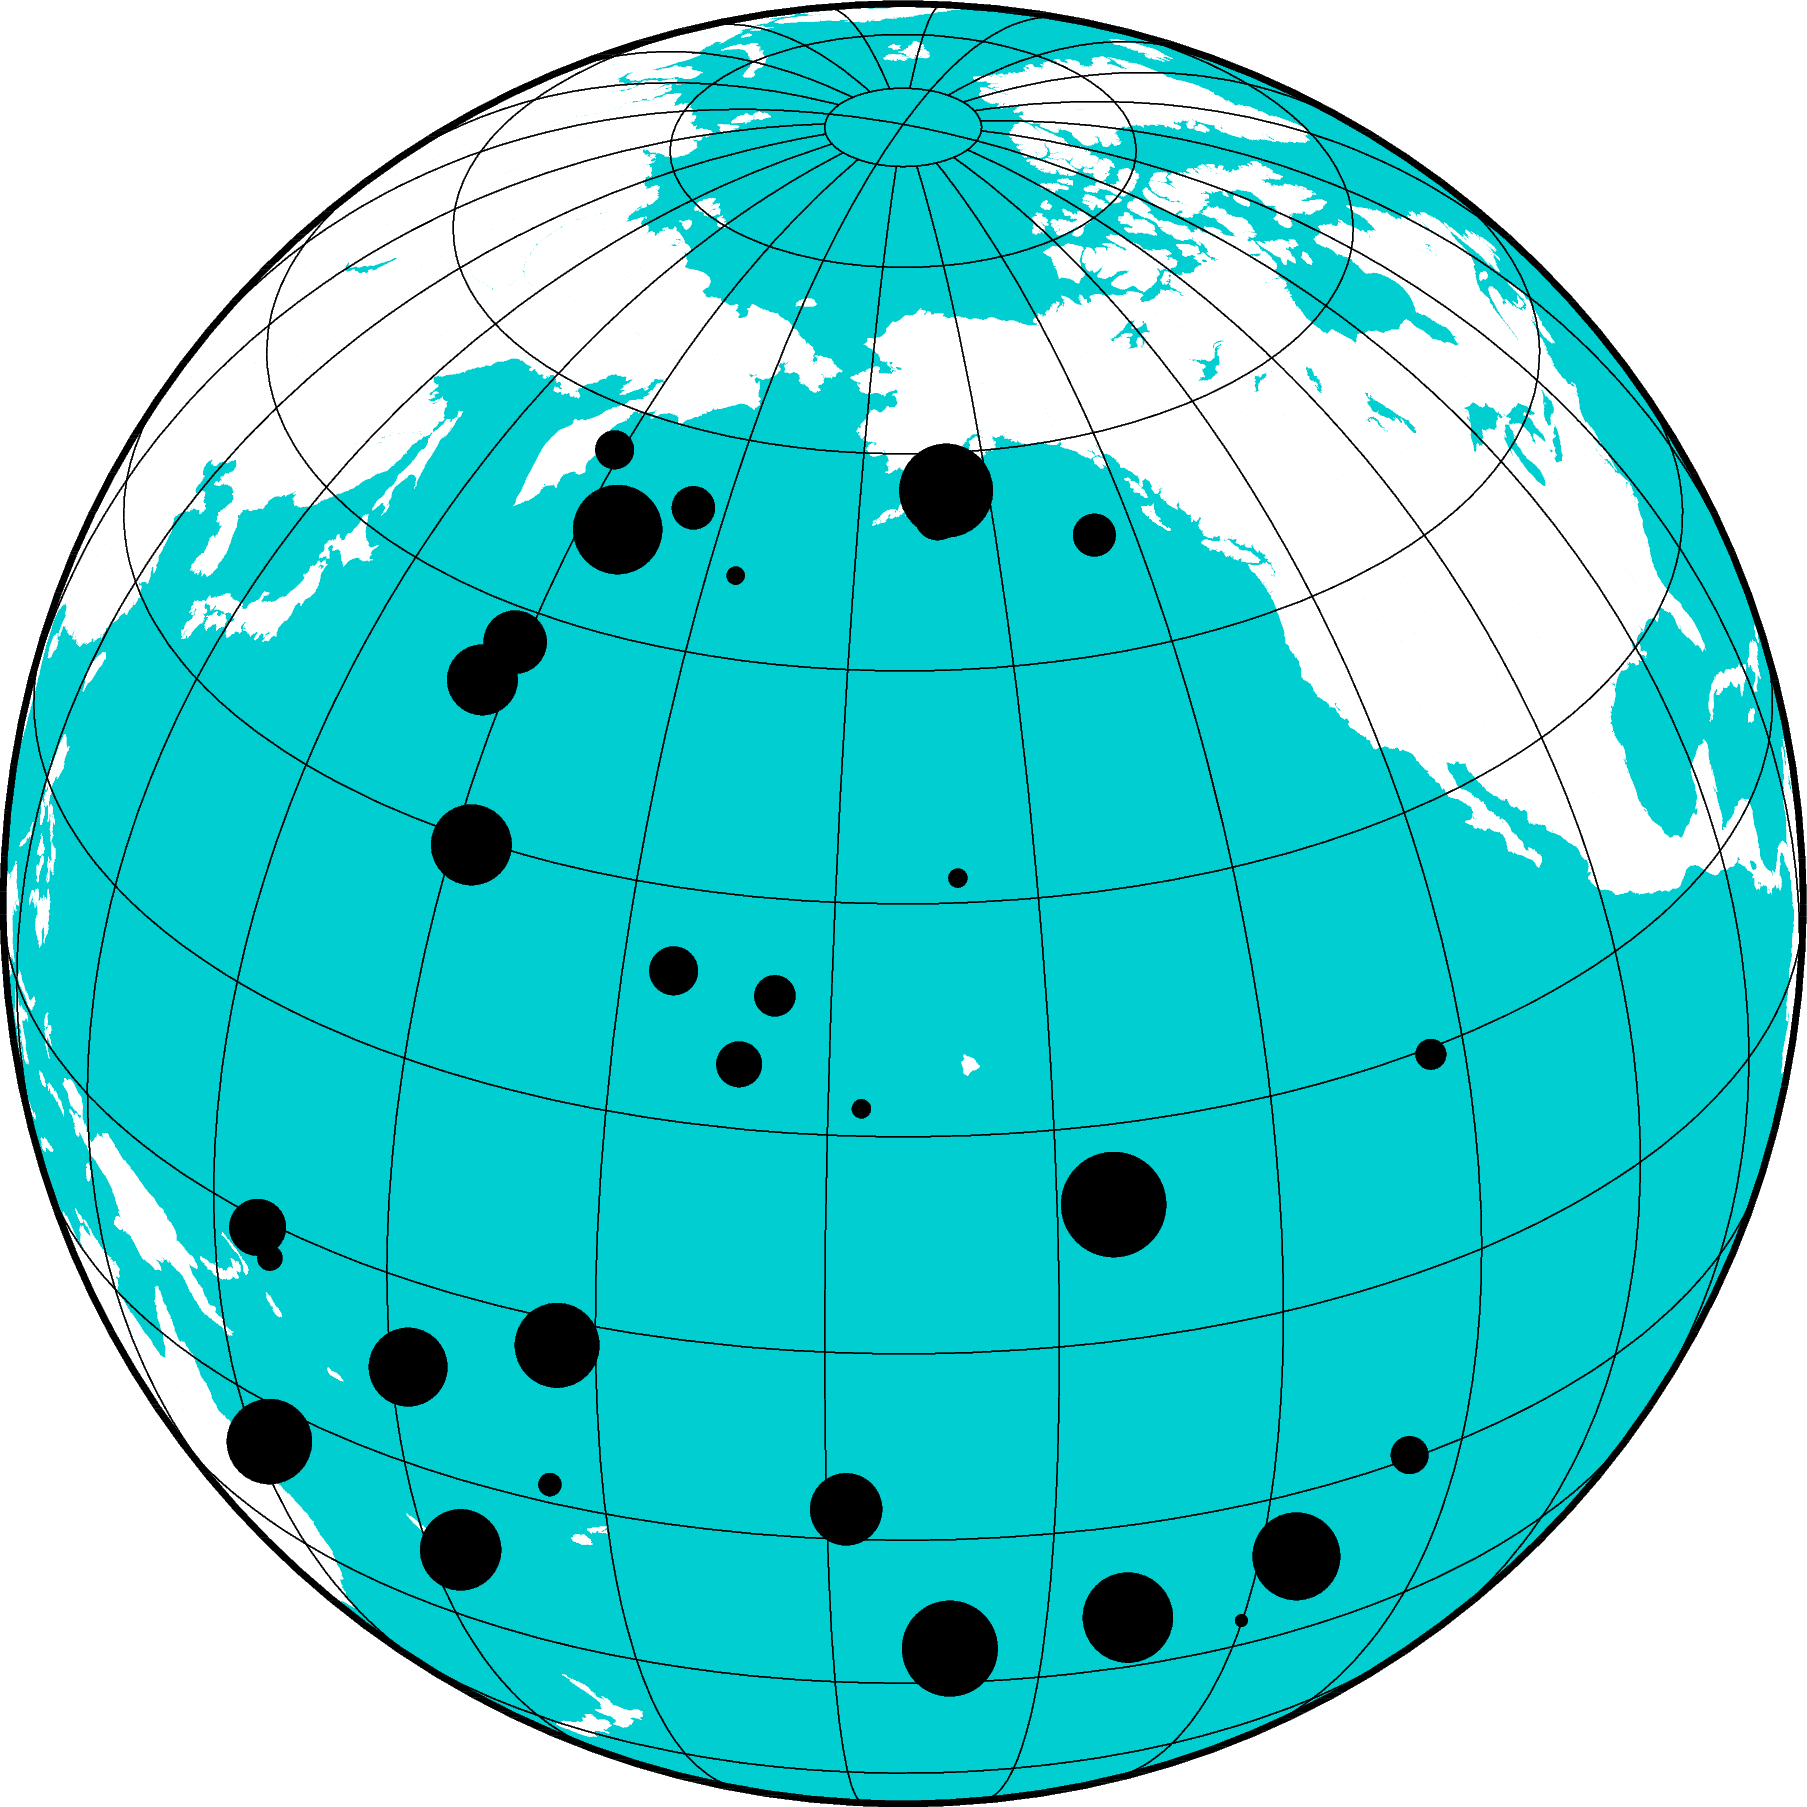

In [11]:
fig = gmt.Figure()
fig.coast(region='g', projection='G200/30/6i', frame='ag', 
          resolution='i', area_thresh=5000, land='white', 
          water='DarkTurquoise')
fig.plot(x=lon, y=lat, sizes=0.1*magnitude, style='cc', color='black')
fig.show()

We can also map the colors of the markers to data by passing `color` as an array and providing a colormap name (`cmap`):

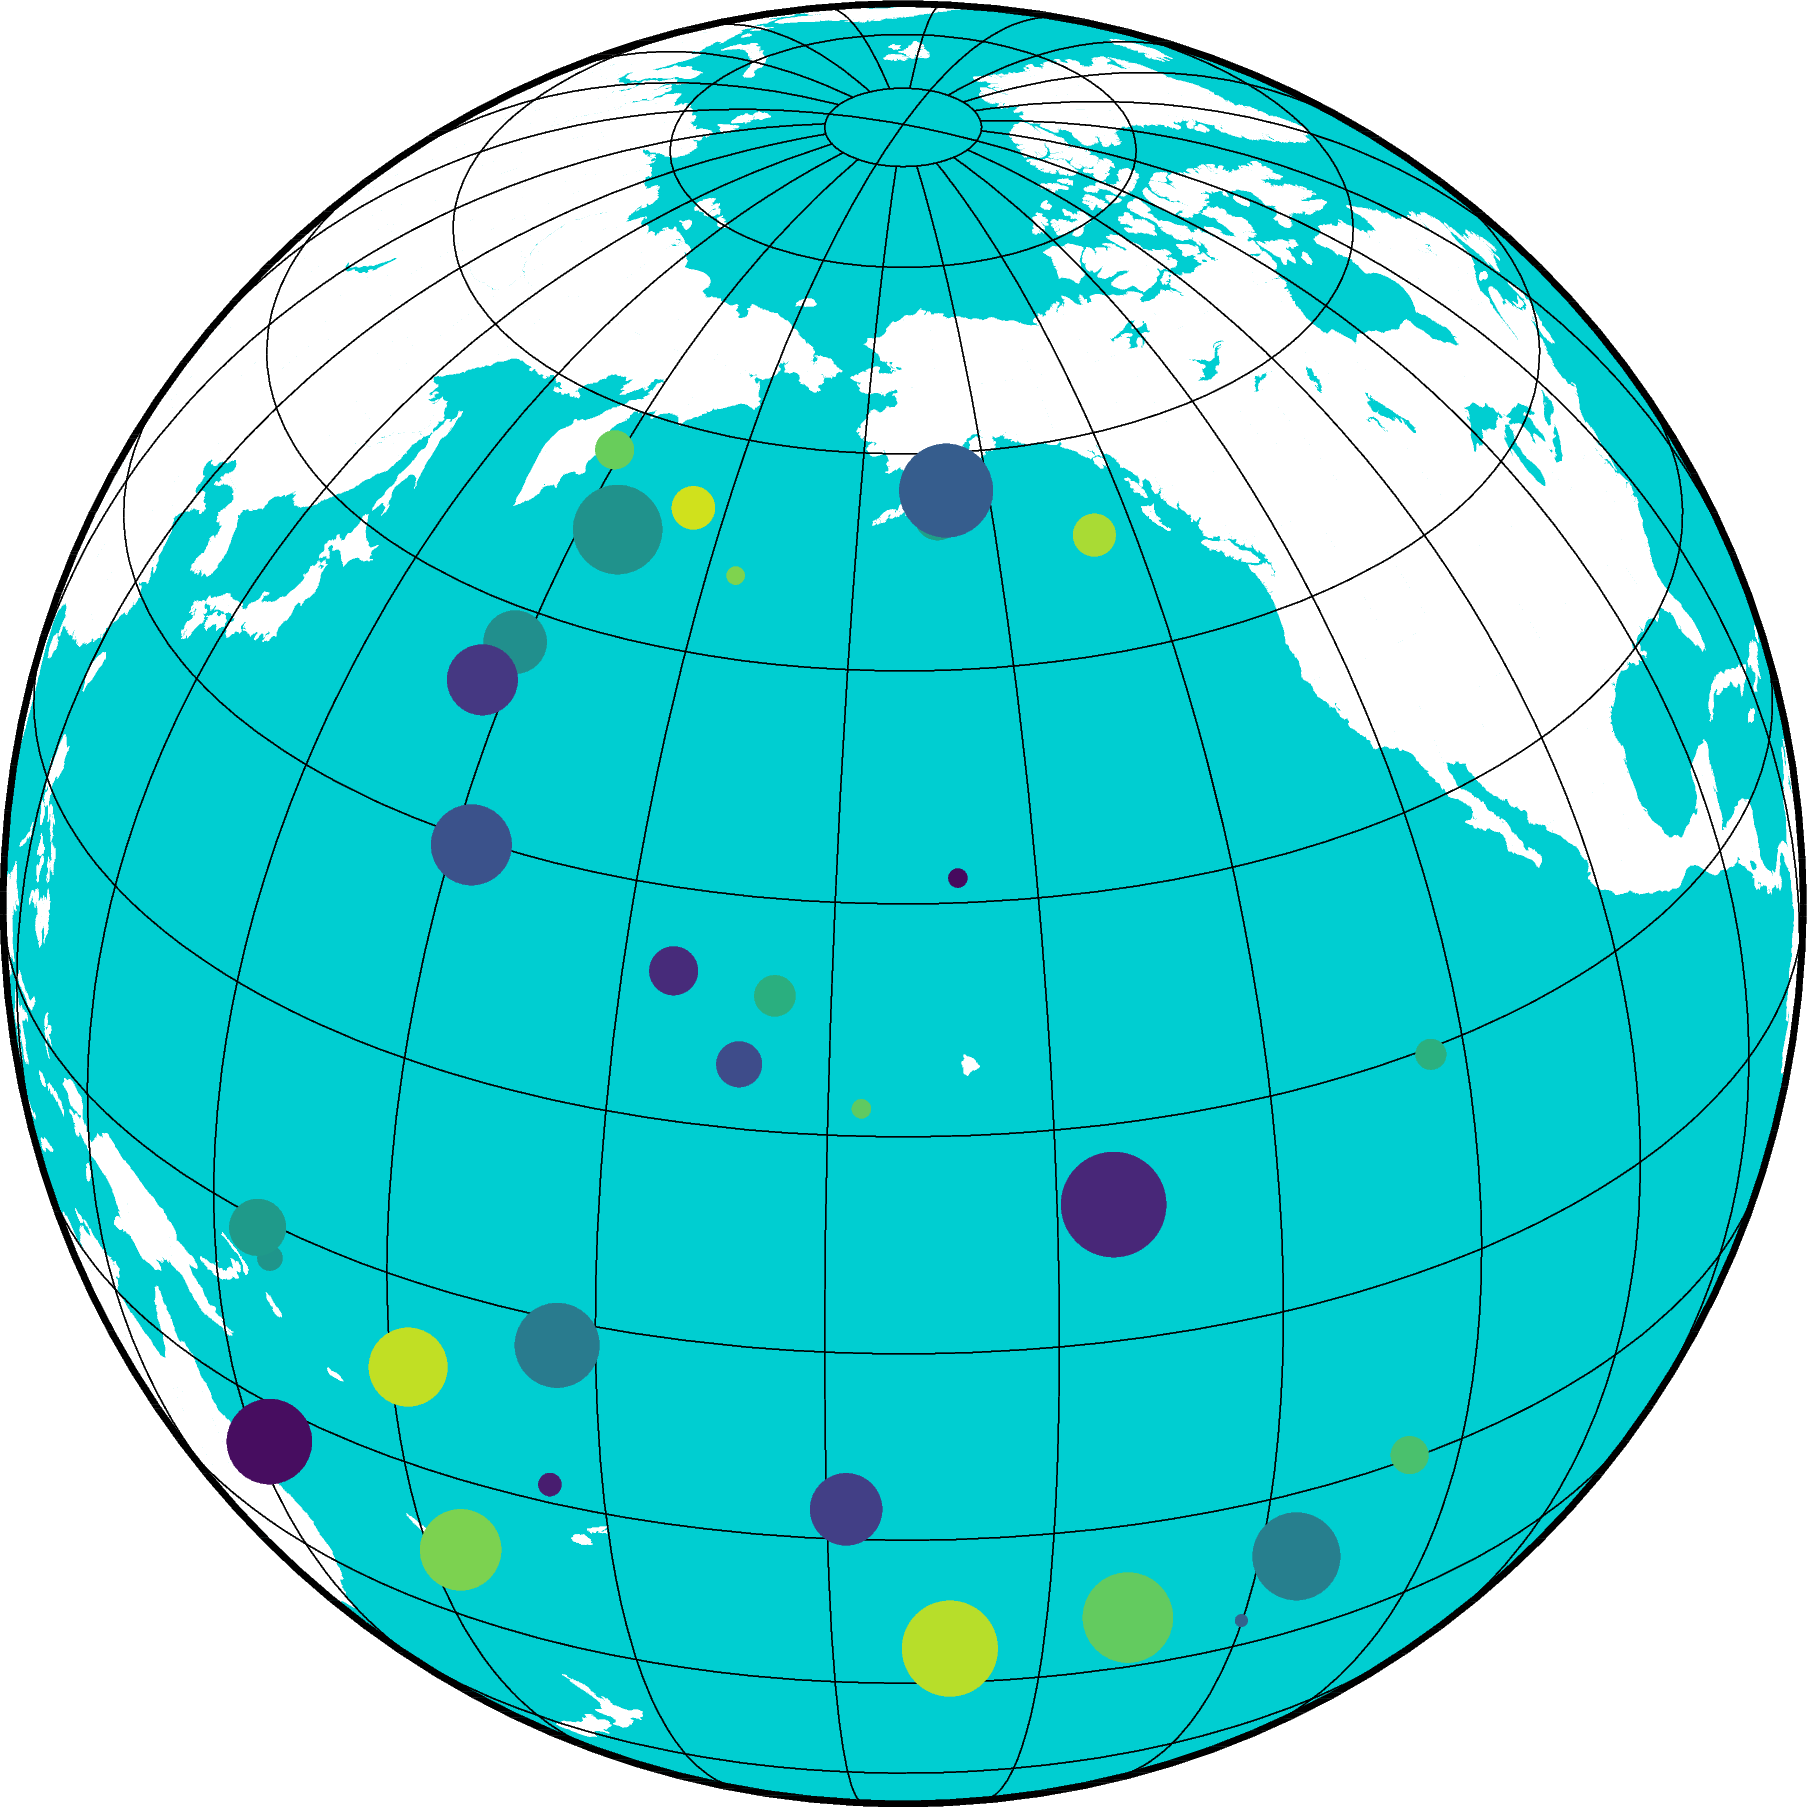

In [12]:
fig = gmt.Figure()
fig.coast(region='g', projection='G200/30/6i', frame='ag', 
          resolution='i', area_thresh=5000, land='white', 
          water='DarkTurquoise')
fig.plot(x=lon, y=lat, style='cc', sizes=0.1*magnitude, 
         color=depth, cmap='viridis')
fig.show()

### Using a matrix

Sometimes, you'll have data that you loaded from a file in the form of a single numpy 2d array (like a table). You can plot these data by passing in `data`.

In [13]:
data = np.transpose([lon, lat, magnitude, depth])

We can use the `columns` argument to specify the columns that correspond to x, y, color, and size, respectively. We'll use it to specify that we want to set the colors using the depths:

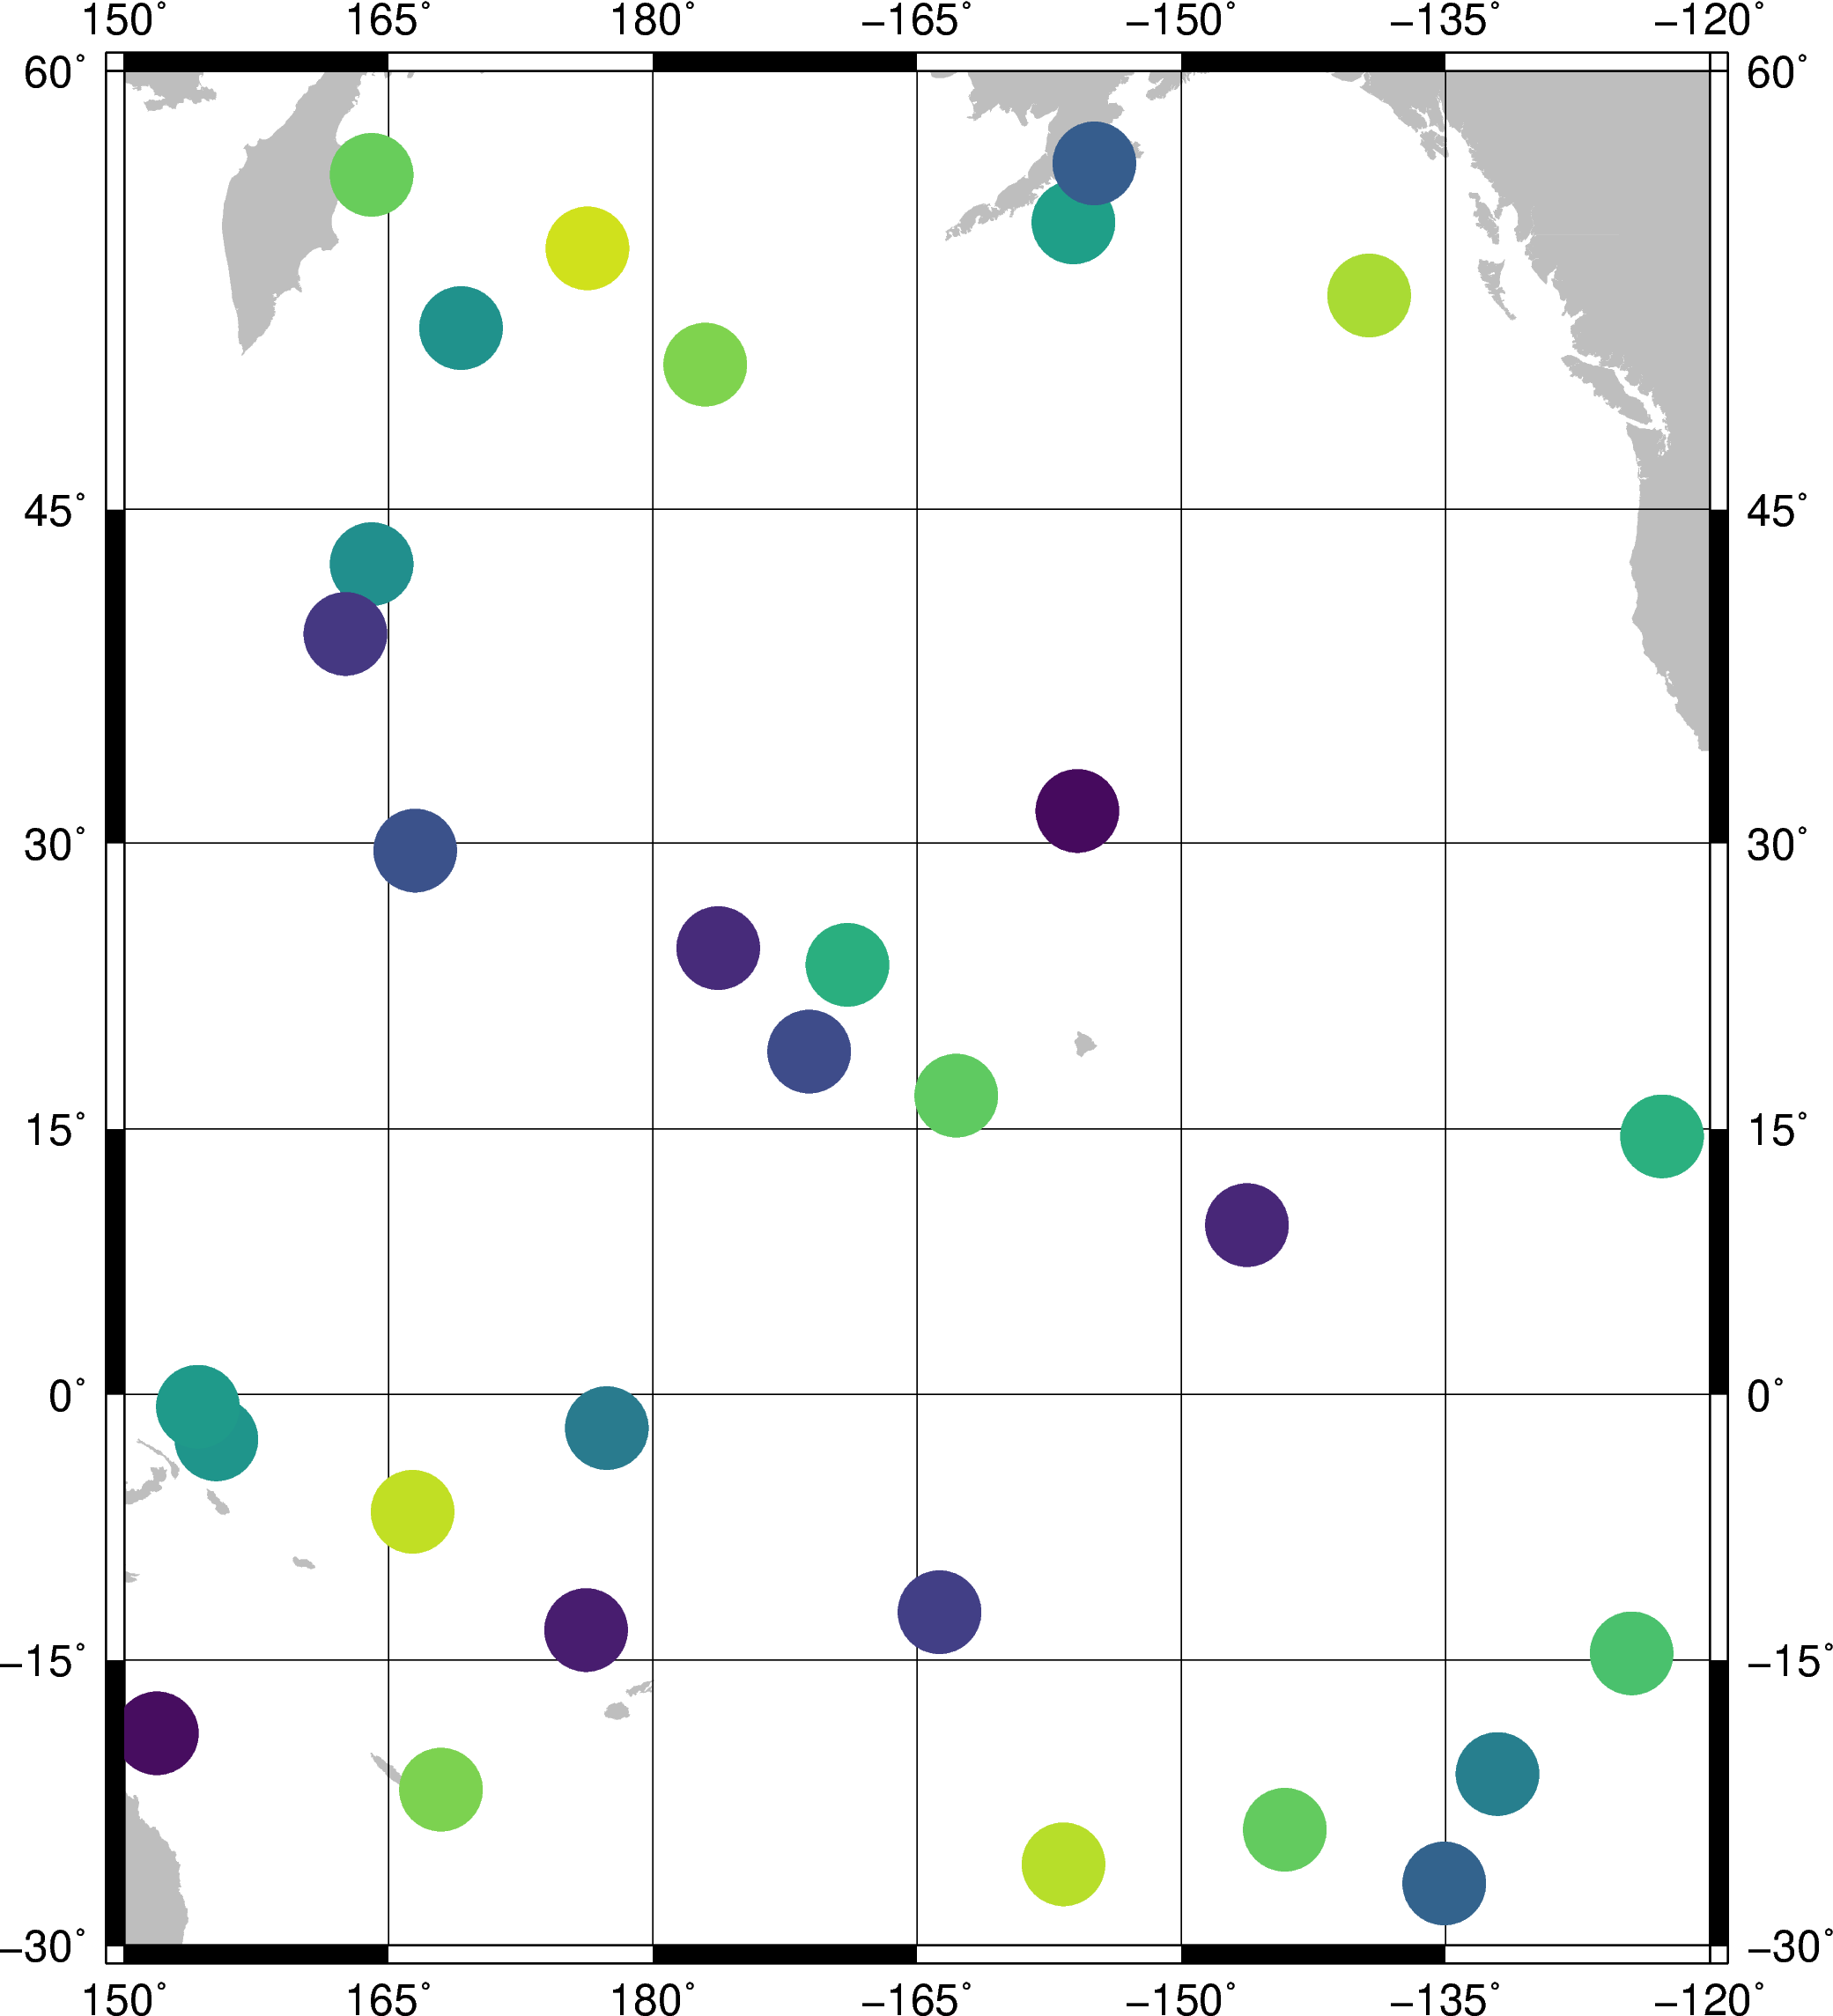

In [18]:
fig = gmt.Figure()
fig.coast(region=region, projection='M6i', frame='ag', 
          resolution='i', area_thresh=5000, land='grey')
fig.plot(data=data, style='c0.8c', cmap='viridis', columns='0,1,3')
fig.show()

### Using a file name

If you have data in a file and you don't need to do any calculations on it, you can pass the file name to `plot` directly. The syntax for plotting will be the same as the example for a data matrix.

First, we must save our sample data to a file:

In [15]:
np.savetxt('first-steps-data.txt', data)

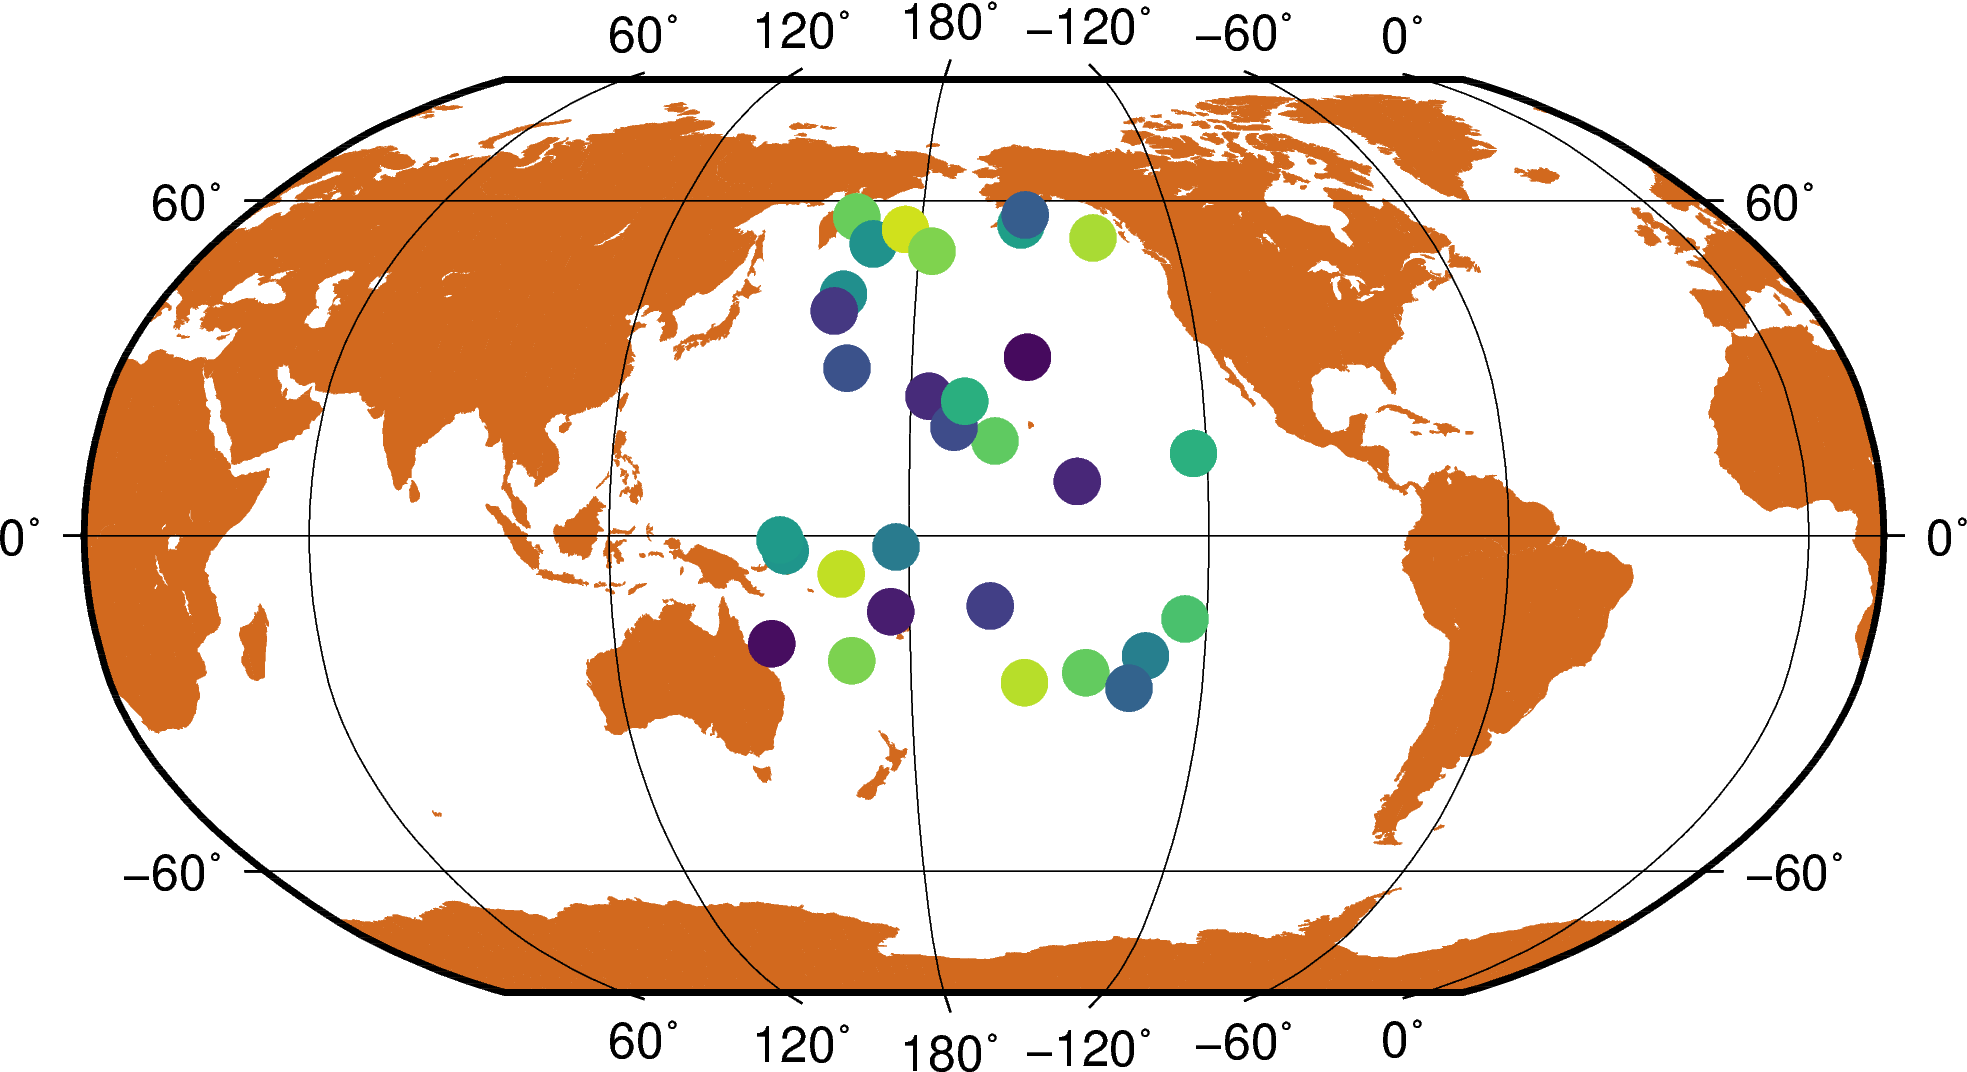

In [16]:
fig = gmt.Figure()
fig.coast(region='g', projection='N-165/6i', frame='ag', 
          resolution='i', area_thresh=5000, land='chocolate')
fig.plot(data='first-steps-data.txt', style='c0.4c', 
         cmap='viridis', columns='0,1,3')
fig.show()

### Using sample data from GMT

GMT ships some sample data that can be accessed by passing `@data_file` as the `data` argument. For example, we can plot the earthquake epicenters from the `tut_quakes.ngdc` sample dataset:

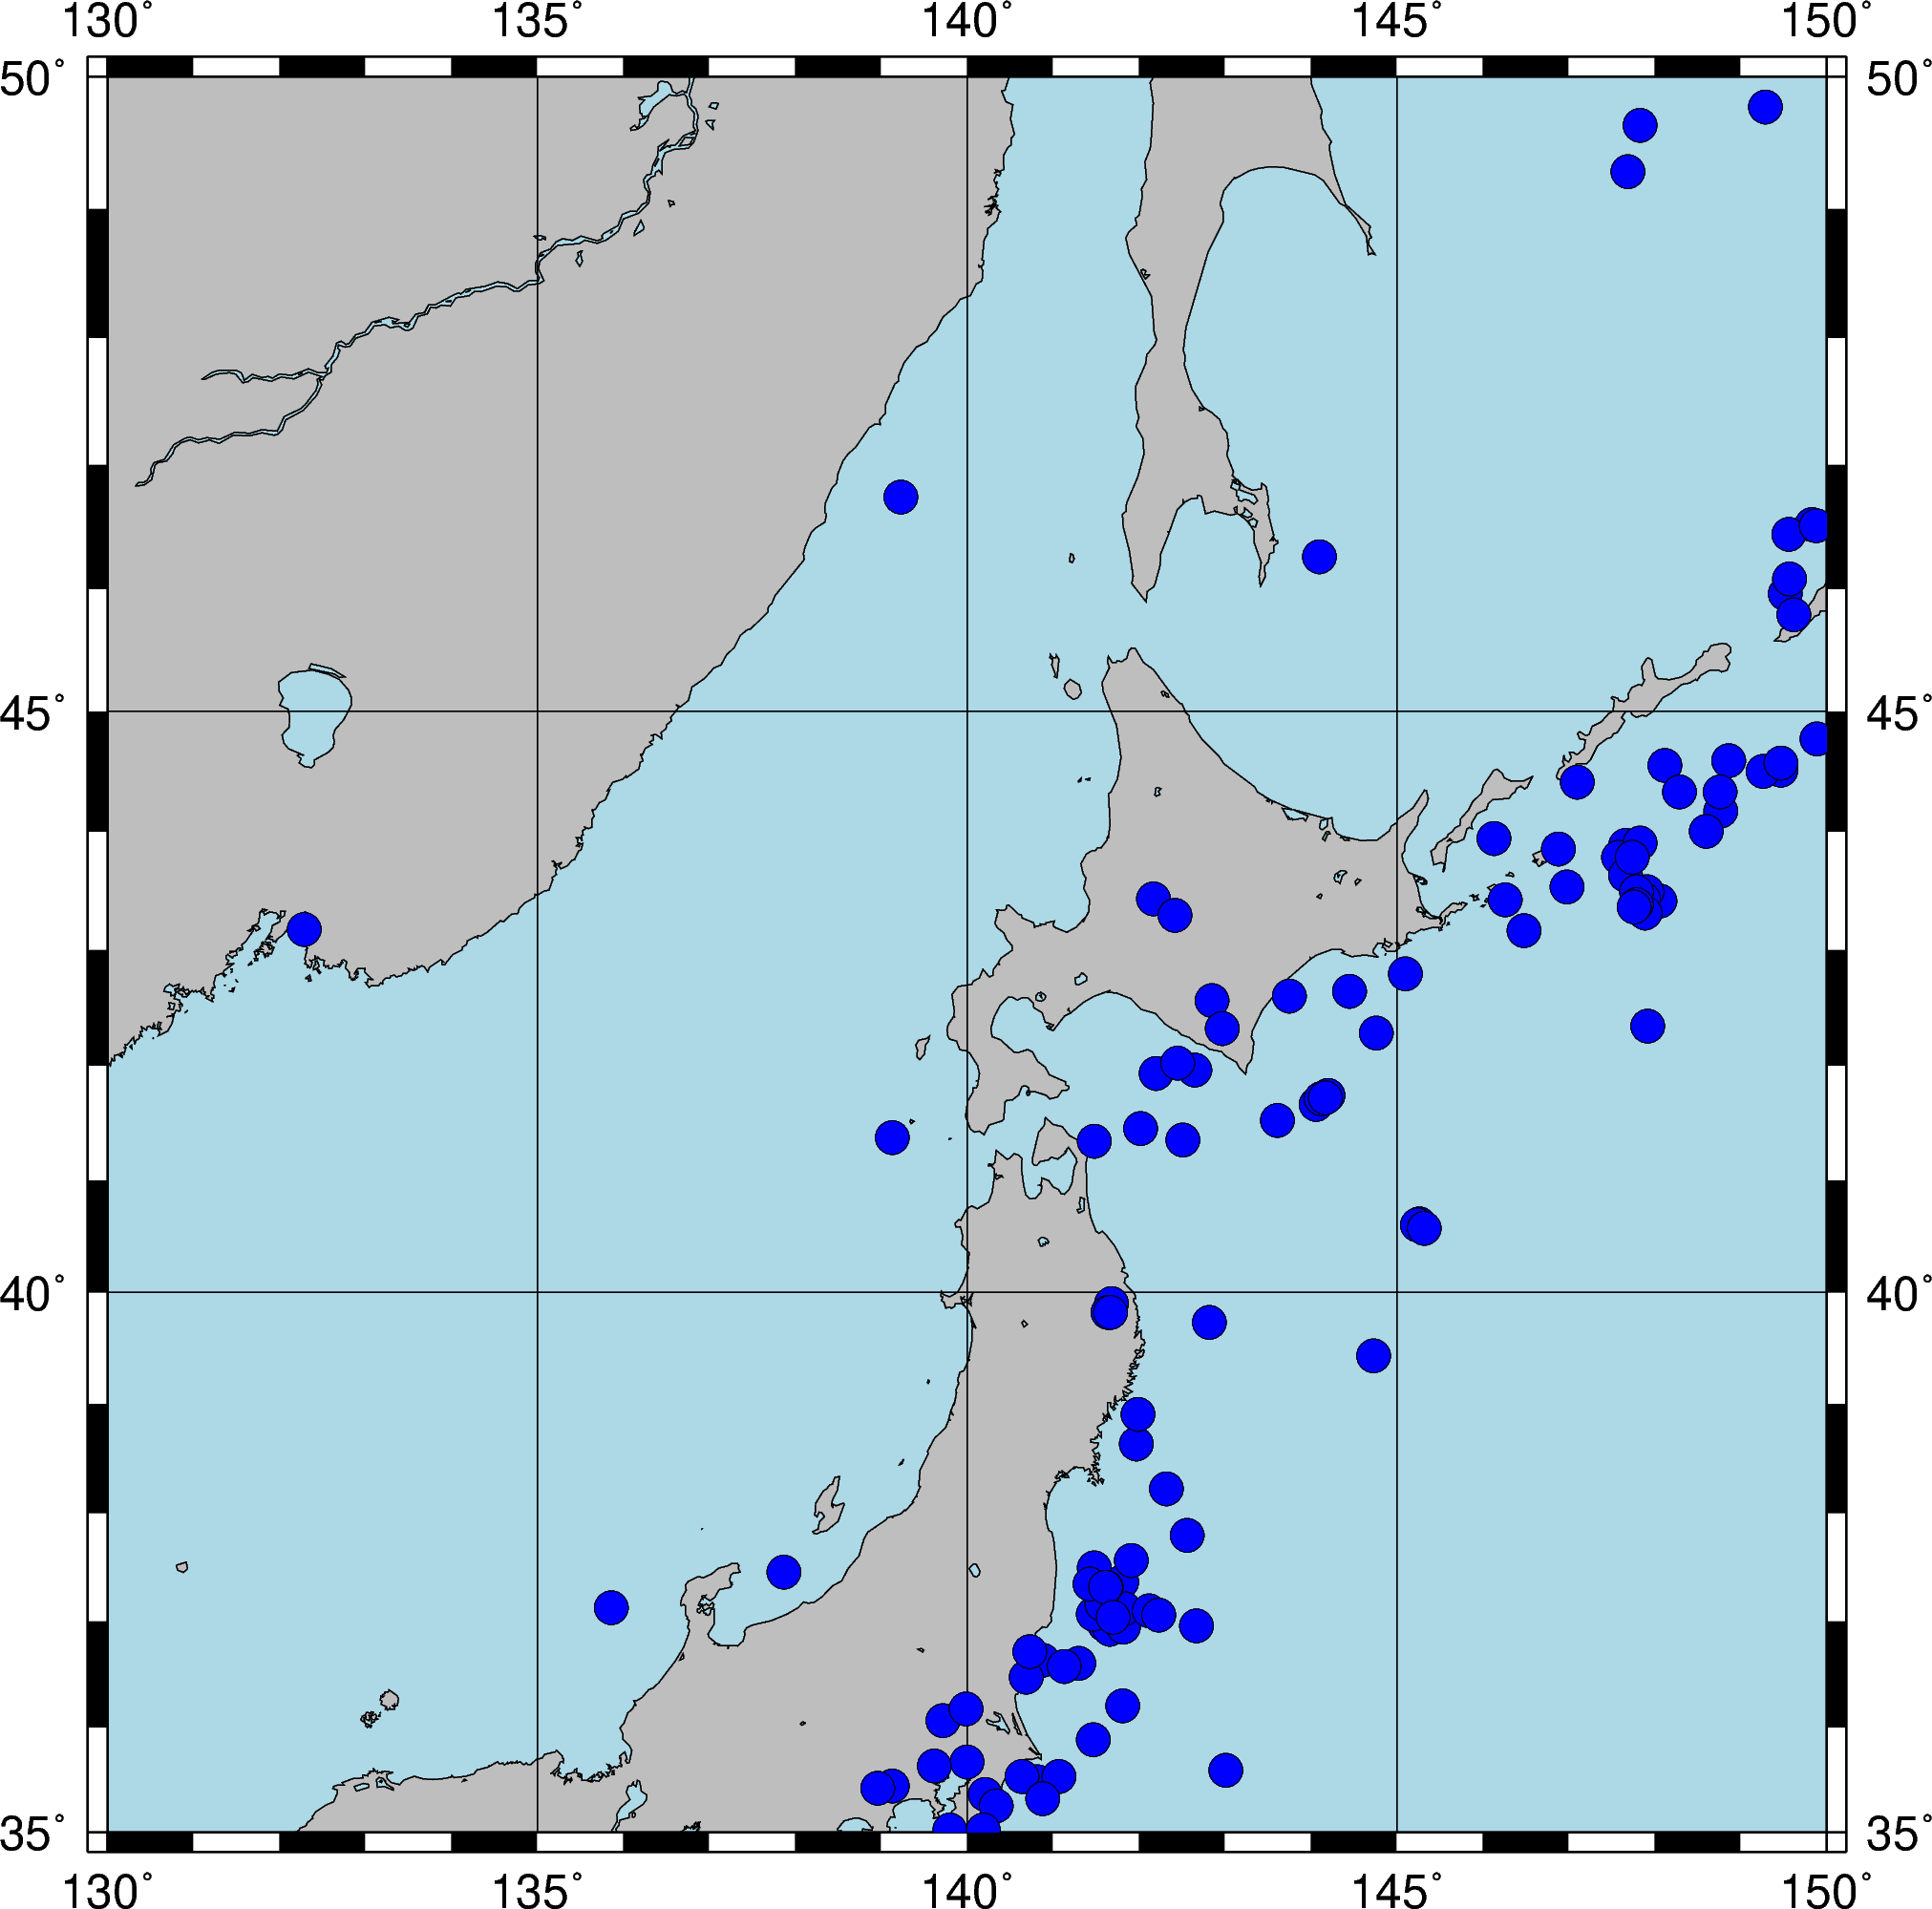

In [17]:
fig_quakes = gmt.Figure()
fig_quakes.coast(
    region=[130, 150, 35, 50], projection='M6i', 
    frame='afg', shorelines=True, land='gray', 
    water='lightblue')
fig_quakes.plot(data='@tut_quakes.ngdc', style='c0.3c', 
                color='blue', pen='faint', columns=[4, 3])
fig_quakes.show()